In [7]:
import pandas as pd
df=pd.read_csv("userMovie.csv")
print("Column names :", df.columns)


Column names : Index(['userid', 'movie1', 'movie2', 'movie3', 'movie4', 'movie5'], dtype='object')


In [9]:

tnu = df['userid'].nunique()


tni = df.iloc[:, 1:].shape[1]


missing_ratings_per_user = df.iloc[:, 1:].isnull().sum(axis=1)


user_with_1_missing = df.loc[missing_ratings_per_user == 2, 'userid'].values
user_with_2_missing = df.loc[missing_ratings_per_user == 3, 'userid'].values
user_with_3_missing = df.loc[missing_ratings_per_user == 5, 'userid'].values


ratings_per_product = df.iloc[:, 1:].notna().sum(axis=0)


missing_ratings_percentage_per_item = df.iloc[:, 1:].isnull().mean(axis=0) * 100


item_with_4_percent_missing = missing_ratings_percentage_per_item[missing_ratings_percentage_per_item == 4].index
item_with_10_percent_missing = missing_ratings_percentage_per_item[missing_ratings_percentage_per_item == 10].index

active_user_id = 'User1'  


active_user_ratings = df[df['userid'] == active_user_id].iloc[:, 1:]


common_users = []
co_rated_items_counts = []

for user in df['userid'].unique():
    if user != active_user_id:
        other_user_ratings = df[df['userid'] == user].iloc[:, 1:]

        
        common_items = active_user_ratings[active_user_ratings.notna()].index.intersection(
            other_user_ratings[other_user_ratings.notna()].index)
        
        if len(common_items) > 0:
            common_users.append(user)
            co_rated_items_counts.append(len(common_items))


no_common_users = len(common_users)
no_coRated_items = sum(co_rated_items_counts)


print("Total number of unique users (tnu):", tnu)
print("Total number of unique items (tni):", tni)
print("Ratings per product:")
print(ratings_per_product)


print("User with 1 missing ratings:", user_with_2_missing)
print("User with 2 missing ratings:", user_with_3_missing)
print("User with 3 missing ratings:", user_with_1_missing)


print("Item with 4% missing ratings:", item_with_4_percent_missing)
print("Item with 10% missing ratings:", item_with_10_percent_missing)




Total number of unique users (tnu): 250
Total number of unique items (tni): 5
Ratings per product:
movie1    247
movie2    247
movie3    247
movie4    248
movie5    248
dtype: int64
User with 1 missing ratings: ['user_2']
User with 2 missing ratings: ['user_18']
User with 3 missing ratings: ['user_11' 'user_67']
Item with 4% missing ratings: Index([], dtype='object')
Item with 10% missing ratings: Index([], dtype='object')


In [14]:
import pandas as pd


data = pd.read_csv("userMovie.csv")


user_column = 'userid'
product_columns = data.columns[1:]  


missing_ratings_per_user = data.iloc[:, 1:].isnull().sum(axis=1)
user_with_2_missing = data.loc[missing_ratings_per_user == 2, 'userid'].values
user_with_3_missing = data.loc[missing_ratings_per_user == 3, 'userid'].values
user_with_5_missing = data.loc[missing_ratings_per_user == 5, 'userid'].values

active_users = user_with_2_missing.tolist() + user_with_3_missing.tolist() + user_with_5_missing.tolist()


co_rating_stats = []


for user in active_users:
   
    user_data = data[data[user_column] == user]
    
    if user_data.empty:
        
        no_common_users = 0
        no_coRated_items = 0
    else:
        
        user_rated_items = user_data.dropna(axis=1, how='all').columns[1:]  
        
       
        co_rated_items = data[data[user_rated_items].notna().any(axis=1)]  
        
       
        no_common_users = co_rated_items[user_column].nunique()  
        no_coRated_items = len(user_rated_items)  
    
    
    co_rating_stats.append([no_common_users, no_coRated_items])


co_rating_df = pd.DataFrame(co_rating_stats, columns=['No_common_users', 'No_coRated_items'])


co_rating_df_sorted = co_rating_df.sort_values(by='No_common_users', ascending=False)


print("\nSorted Co-Rating Statistics:")
print(co_rating_df_sorted)



Sorted Co-Rating Statistics:
   No_common_users  No_coRated_items
0              248                 3
1              248                 3
2              247                 2
3                0                 0


In [15]:
import pandas as pd


data = pd.read_csv("userMovie.csv")


user_column = 'userid'
product_columns = data.columns[1:]  


missing_ratings_per_user = data.iloc[:, 1:].isnull().sum(axis=1)
user_with_2_missing = data.loc[missing_ratings_per_user == 2, 'userid'].values
user_with_3_missing = data.loc[missing_ratings_per_user == 3, 'userid'].values
user_with_5_missing = data.loc[missing_ratings_per_user == 5, 'userid'].values

active_users = user_with_2_missing.tolist() + user_with_3_missing.tolist() + user_with_5_missing.tolist()


co_rating_stats = []


for user in active_users:
    
    user_data = data[data[user_column] == user]
    
    if user_data.empty:
       
        no_common_users = 0
        no_coRated_items = 0
    else:
        
        user_rated_items = user_data.dropna(axis=1, how='all').columns[1:]  
        
      
        co_rated_items = data[data[user_rated_items].notna().any(axis=1)]  
        
        no_common_users = co_rated_items[user_column].nunique()  
        no_coRated_items = len(user_rated_items)  

    
    co_rating_stats.append([no_common_users, no_coRated_items])


co_rating_df = pd.DataFrame(co_rating_stats, columns=['No_common_users', 'No_coRated_items'])


co_rating_df_sorted = co_rating_df.sort_values(by='No_common_users', ascending=False)

sorted_array = co_rating_df_sorted.values



print("\nSorted 2-D Array (No_common_users in descending order, No_coRated_items in corresponding order):") # Display the result as a 2-D array
print(sorted_array)



Sorted 2-D Array (No_common_users in descending order, No_coRated_items in corresponding order):
[[248   3]
 [248   3]
 [247   2]
 [  0   0]]


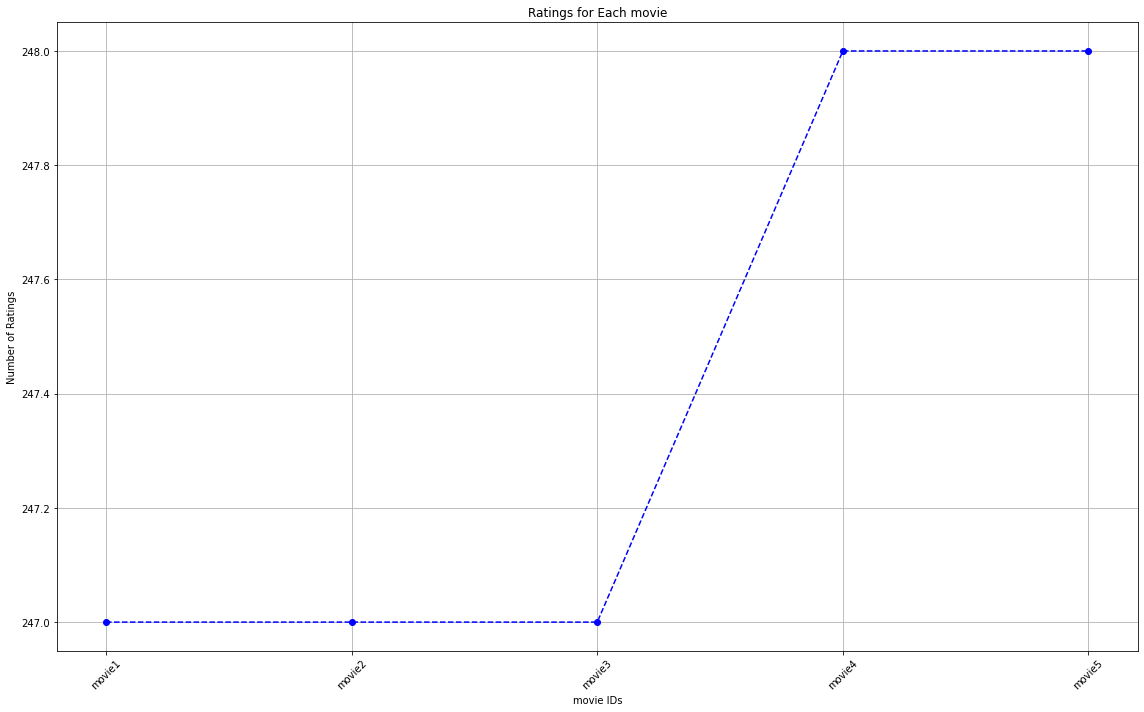

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("userMovie.csv")

ratings_count = df.iloc[:, 1:].notnull().sum(axis=0)  

plt.figure(figsize=(16,10 ))
plt.plot(ratings_count.index, ratings_count.values, marker='o', linestyle='--', color='b')
plt.title('Ratings for Each movie')
plt.xlabel('movie IDs')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()


plt.show()


In [ ]:
import pandas as pd


data = pd.read_csv("userMovie.csv")


user_column = 'userid'
product_columns = data.columns[1:]  


missing_ratings_per_user = data.iloc[:, 1:].isnull().sum(axis=1)
user_with_2_missing = data.loc[missing_ratings_per_user == 2, 'userid'].values
user_with_3_missing = data.loc[missing_ratings_per_user == 3, 'userid'].values
user_with_5_missing = data.loc[missing_ratings_per_user == 5, 'userid'].values

active_users = user_with_2_missing.tolist() + user_with_3_missing.tolist() + user_with_5_missing.tolist()


thresholds = {}


for user in active_users:
    
    user_data = data[data[user_column] == user]
    
    if user_data.empty:
        thresholds[user] = 0
        continue
    
    
    user_rated_items = user_data.iloc[0, 1:].dropna().index  
    
    if user_rated_items.empty:
        thresholds[user] = 0
        continue
    
    
    co_ratings = []
    for _, other_user_data in data.iterrows():
        if other_user_data[user_column] == user:
            continue
        
       
        other_user_rated_items = other_user_data[user_rated_items].dropna()
        co_rated_count = len(other_user_rated_items)
        
        total_items_rated_by_user = len(user_rated_items)
        if total_items_rated_by_user > 0:
            co_rated_percentage = (co_rated_count / total_items_rated_by_user) * 100
        else:
            co_rated_percentage = 0
        
        
        if co_rated_percentage >= 30:
            co_ratings.append(other_user_data[user_column])
    
    
    thresholds[user] = len(set(co_ratings))


print("Thresholds (ß) for each active user:")
for user, beta in thresholds.items():
    print(f"User {user}: ß = {beta}")
